# Complex Numbers in Python

Contributors: Daniel Lay, TODO

A complex number $z=x+iy$ has a real part, $x$, and an imaginary part, $y$. In this notebook, we'll discuss:

- How to use complex numbers in Python, including common pitfalls
- When complex numbers show up in physics, and numerical methods for such problems (too grandiose?)
- The Fourier transformation
- Contour integration, and how to visualize it

## The Basics

Python has native support for complex numbers. To write a complex number, such as $3+4i$, you write the code '3+4 * 1j':

In [3]:
my_complex_number = 3 + 4*1j
print("type(my_complex_number):",type(my_complex_number))

type(my_complex_number): <class 'complex'>


As you can see, the variable 'my_complex_number' is of class 'complex', which is Python's way of saying it's a complex number. Additionally, some operations respect that this is a complex number. For instance, the 'abs' function now behaves as the mathematical operation $|z|=\sqrt{x^2+y^2}$, as we can check with our complex variable:

In [7]:
print('abs(my_complex_number):',abs(my_complex_number))

abs(my_complex_number): 5.0


As with most mathematical operations you've encountered (e.g. matrix operations), it is easier to work with numpy, and indeed, numpy has support for complex numbers. You can make an array like normal, except with complex entries:

In [10]:
import numpy as np

my_complex_array = np.array([3+4*1j,5+6.7*1j])
print('my_complex_array:',my_complex_array)

my_complex_array: [3.+4.j  5.+6.7j]


To check that this is a complex array, you can print 'my_complex_array.dtype' (if you instead type 'type(my_complex_array)', you just get np.ndarray back - Python can't tell the type of data inside of a numpy array):

In [11]:
print('my_complex_array.dtype:',my_complex_array.dtype)

my_complex_array.dtype: complex128


Conceptual check number TODO: how would you implement the Pauli matrices in numpy?

Numpy also lets you multiply by scalars (real or complex), like you would expect:

In [14]:
print('2 * my_complex_array:',2*my_complex_array)
print('1j * my_complex_array):',1j*my_complex_array)
print('(2+3*1j) * my_complex_array):',(2+3*1j)*my_complex_array)

2 * my_complex_array: [ 6. +8.j  10.+13.4j]
1j * my_complex_array): [-4. +3.j -6.7+5.j]
(2+3*1j) * my_complex_array): [ -6. +17.j  -10.1+28.4j]


And, you can take the complex conjugate of the array (element-wise):

In [16]:
print('my_complex_array:',my_complex_array)
print('np.conjugate(my_complex_array):',np.conjugate(my_complex_array))

my_complex_array: [3.+4.j  5.+6.7j]
np.conjugate(my_complex_array): [3.-4.j  5.-6.7j]


As a quick conceptual check: how would you take the *Hermitian conjugate* of 'my_complex_array' (i.e. the conjugate transpose)? TODO clever thing Josh did

If you decide that you only care about the real part of an array, numpy lets you access that nicely:

In [17]:
print('np.real(my_complex_array):',np.real(my_complex_array))

np.real(my_complex_array): [3. 5.]


Be warned, though: often times, functions in other packages discard the imaginary part of the array, which can lead to unexpected behavior! Typically they will warn you about this, but it can be a problem! TODO: find an example

Other things to cover:
- Matrix multiplication (assuming they've implemented Pauli matrices)
- Eigenvalues/eigenvectors (eig vs eigh?)
- Inner products
- Hermitian matrices?
- Special functions evaluated at complex arguments? (maybe when talking about Riemann sheets?)

## The Fourier Transform

Where to start with this...

- Nice example that can be computed by hand (sin function? sum of trig functions? sum of complex exponentials?)
- Defined in integral case as blah
- Defined in sum case as blah
- Naive implementation vs FFT (runtime?)
- It's a basis change! and what that tells us for obvious case
- More complicated thing - take random noise around the sin function, and take discrete Fourier transform to reveal structure (maybe sin(x) + 0.01 * sin(40x) - looks like noise, but is actually two signals)

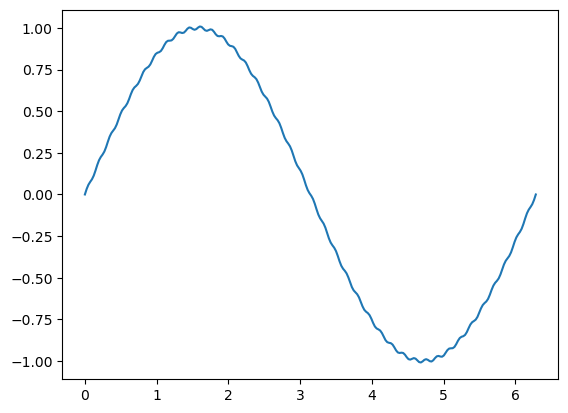

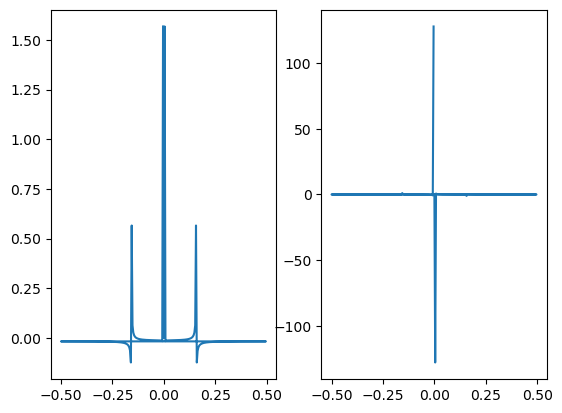

In [43]:
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,256)

f = lambda x: np.sin(x) + 0.01 * np.sin(40*x)
fEval = f(x)

fig, ax =plt.subplots()
ax.plot(x,fEval)

freq = np.fft.fftfreq(x.shape[-1])
fftEval = np.fft.fft(fEval)
fig, ax = plt.subplots(ncols=2,sharex=True)
ax[0].plot(freq,np.real(fftEval))
ax[1].plot(freq,np.imag(fftEval))